# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("./Data/train.csv") # 학습용 데이터
df_test = pd.read_csv("./Data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [6]:
df_train = df_train.drop("is_converted", axis=1)
df_test = df_test.drop(["id", "is_converted"], axis=1)
df = pd.concat([df_train, df_test], ignore_index=True)
df

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64565,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,NaN,...,associate/analyst,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97
64566,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,NaN,...,none,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438
64567,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,manager,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97
64568,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,NaN,...,none,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429


In [7]:
df[df['expected_timeline'] == 'Other']

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner


In [8]:
def wordcloud_visualize(df):

    # 토큰과 빈도수를 따로 분리합니다.
    tokens = list(df.value_counts().keys())
    frequencies = df.value_counts()

    # 상위 n개의 토큰만 선택하여 시각화할 수도 있습니다.
    n = 50
    top_tokens = tokens[:n]
    top_frequencies = frequencies[:n]

    # 막대 그래프로 시각화합니다.
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_tokens)), top_frequencies, tick_label=top_tokens)
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.title('Top {} Tokens Frequency'.format(n))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # 워드 클라우드로 시각화합니다.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tokens')
    plt.show()

In [9]:
df[df['customer_position'] == 'others']

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner
334,1.00,/MADURAI/India,AS,0.088889,42175,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,others,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,19
364,0.50,/cebu city/Philippines,AS,0.066667,46166,NaN,Enterprise,NaN,NaN,NaN,...,others,LGEPH,NaN,0,0,0.003079,0.026846,corporate / office,NaN,84
384,1.00,/Iquique /Chile,AS,0.003937,7715,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,others,LGECL,9 months ~ 1 year,0,0,0.003079,0.026846,corporate / office,NaN,124
644,1.00,/Bangalore/India,ID,0.057534,30995,NaN,Enterprise,NaN,1.0,NaN,...,others,LGEIL,3 months ~ 6 months,0,0,0.003079,0.064566,corporate / office,NaN,175
3578,1.00,/Muzaffarpur/India,ID,NaN,47466,NaN,Enterprise,4.0,NaN,NaN,...,others,LGEIL,3 months ~ 6 months,0,0,NaN,NaN,NaN,NaN,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64531,1.00,/ shihor / India,ID,NaN,42361,NaN,Enterprise,NaN,NaN,NaN,...,others,LGEIL,more than a year,0,0,NaN,NaN,NaN,NaN,174
64537,0.50,/ São Paulo / Brazil,AS,NaN,22390,NaN,Enterprise,NaN,NaN,NaN,...,others,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97
64541,0.50,/São paulo/Brazil,AS,NaN,13584,NaN,Enterprise,NaN,NaN,NaN,...,others,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97
64549,0.75,/ Paranaque / Philippines,AS,NaN,14263,End Customer,Enterprise,NaN,NaN,NaN,...,others,LGEPH,9 months ~ 1 year,0,0,NaN,NaN,NaN,NaN,135


## 2. Preprocessing

### Customer country, response_corporate

In [10]:
df_con_cor = df[['customer_country', 'response_corporate', 'lead_owner']]
df_con_cor

,customer_country,response_corporate,lead_owner
0,/Quezon City/Philippines,LGEPH,0
1,/PH-00/Philippines,LGEPH,1
2,/Kolkata /India,LGEIL,2
3,/Bhubaneswar/India,LGEIL,3
4,/Hyderabad/India,LGEIL,4
...,...,...,...
64565,/São Paulo/Brazil,LGESP,97
64566,General / / United States,LGEUS,438
64567,/ OURO BRANCO / Brazil,LGESP,97
64568,/ / Germany,LGEDG,429


In [11]:
def list_length(cell):
    return len(cell)


empty_list = pd.Series([[]] * len(df_con_cor))

df_con_cor['customer_country_preprocess'] = df_con_cor['customer_country'].str.lower().str.replace('\s+', '', regex=True).replace('/', ' ', regex=True).str.strip().str.split()
df_con_cor['customer_country_preprocess'] = df_con_cor['customer_country_preprocess'].fillna(pd.Series([[]] * len(df), index=df.index)).apply(lambda x: x[-2:])
df_con_cor['customer_country_len'] = df_con_cor['customer_country_preprocess'].apply(list_length)
df_con_cor['customer_country_city'] = df_con_cor['customer_country_preprocess'].apply(lambda x: x[-2] if len(x) == 2 else None)
df_con_cor['customer_country_coun'] = df_con_cor['customer_country_preprocess'].apply(lambda x: x[-1] if len(x) >= 1 else None)
df_con_cor

,customer_country,response_corporate,lead_owner,customer_country_preprocess,customer_country_len,customer_country_city,customer_country_coun
0,/Quezon City/Philippines,LGEPH,0,"[quezoncity, philippines]",2,quezoncity,philippines
1,/PH-00/Philippines,LGEPH,1,"[ph-00, philippines]",2,ph-00,philippines
2,/Kolkata /India,LGEIL,2,"[kolkata, india]",2,kolkata,india
3,/Bhubaneswar/India,LGEIL,3,"[bhubaneswar, india]",2,bhubaneswar,india
4,/Hyderabad/India,LGEIL,4,"[hyderabad, india]",2,hyderabad,india
...,...,...,...,...,...,...,...
64565,/São Paulo/Brazil,LGESP,97,"[sãopaulo, brazil]",2,sãopaulo,brazil
64566,General / / United States,LGEUS,438,"[general, unitedstates]",2,general,unitedstates
64567,/ OURO BRANCO / Brazil,LGESP,97,"[ourobranco, brazil]",2,ourobranco,brazil
64568,/ / Germany,LGEDG,429,[germany],1,None,germany


In [12]:
df_con_cor['customer_country_city'].value_counts()

customer_country_city
sãopaulo         1909
mumbai            792
hyderabad         724
santiago          699
lima              677
                 ... 
sindagi             1
lethbridge          1
unitedkindgom       1
flevoland           1
dsf                 1
Name: count, Length: 10410, dtype: int64

In [13]:
df_con_cor['customer_country_coun'].value_counts()

customer_country_coun
india            17757
brazil            9784
unitedstates      4580
mexico            2933
philippines       2858
                 ...  
joãopessoa           1
mauritania           1
norwalk              1
pembrokepines        1
wildwood             1
Name: count, Length: 1388, dtype: int64

In [14]:
df_con_cor['customer_country_len'].value_counts()

customer_country_len
2    46014
1    16873
0     1683
Name: count, dtype: int64

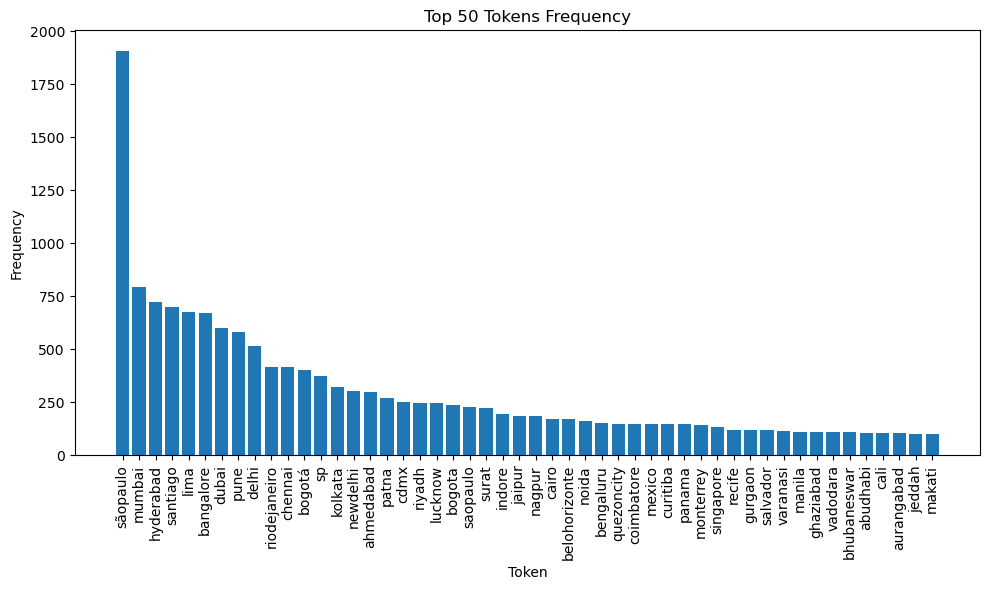

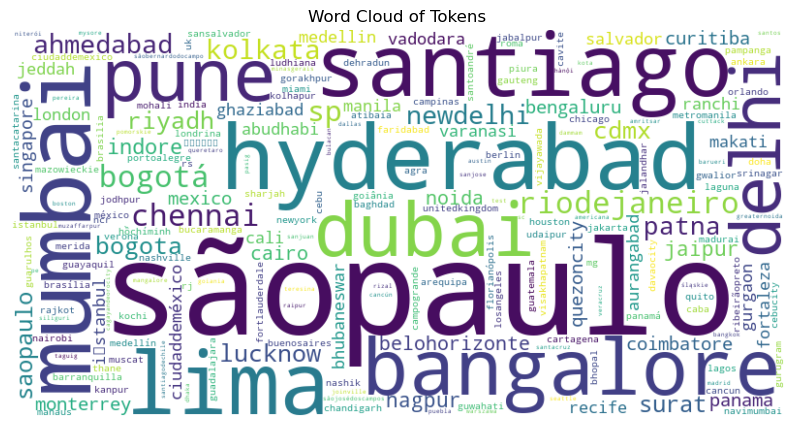

In [15]:
con_city = df_con_cor['customer_country_city']
wordcloud_visualize(con_city)

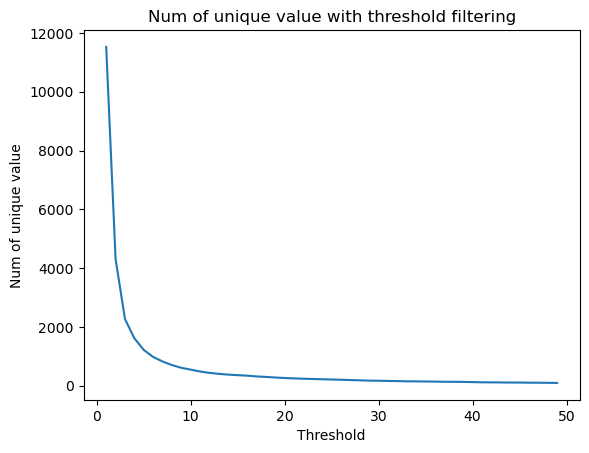

In [16]:
# train에만 나오는 것들 바꾸기
df_copy = df_train.copy()

df_copy['customer_country_preprocess'] = df_copy['customer_country'].str.replace('\s+', '', regex=True).replace('/', ' ', regex=True).str.strip().str.split()
df_copy['customer_country_preprocess'] = df_copy['customer_country_preprocess'].fillna(empty_list).apply(lambda x: x[-2:])

df_copy['customer_country_city'] = df_copy['customer_country_preprocess'].apply(lambda x: x[-2] if len(x) == 2 else None)
df_copy['customer_country_coun'] = df_copy['customer_country_preprocess'].apply(lambda x: x[-1] if len(x) >= 1 else None)

threshold_list = []
nunique_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 50):
    threshold = threshold
    value_counts = df_copy['customer_country_city'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_country_city'].isin(filtered_values)]

    threshold_list.append(threshold)
    nunique_list.append(filtered_df['customer_country_city'].nunique())

# 그래프 그리기
plt.plot(threshold_list, nunique_list)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

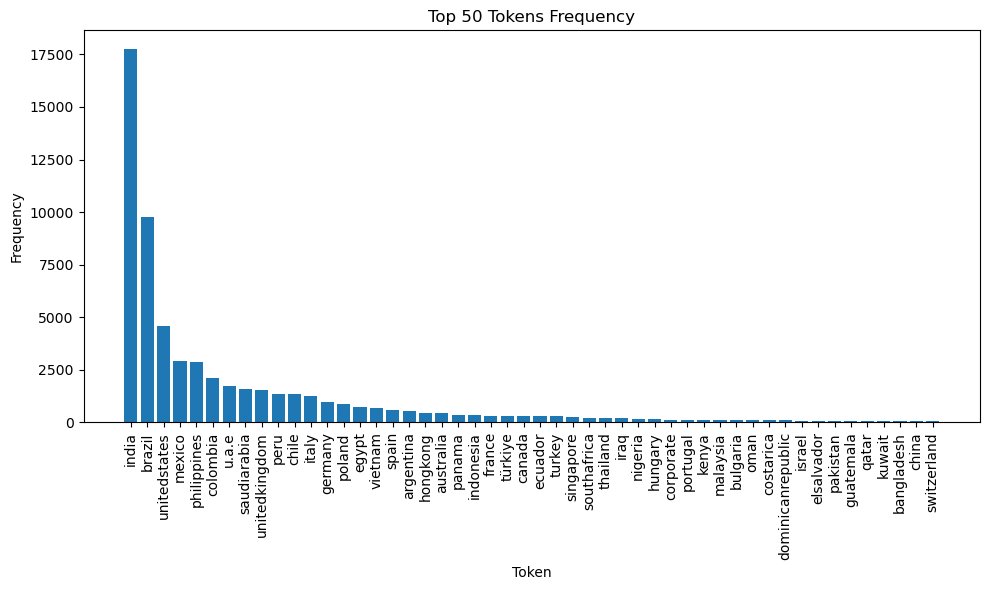

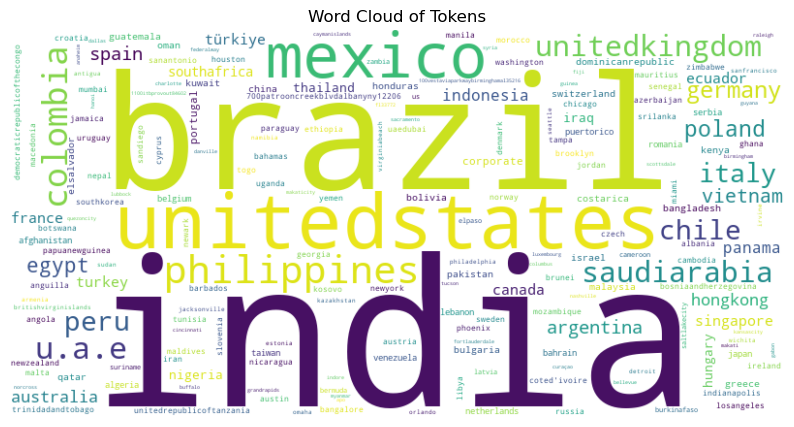

In [17]:
con_coun = df_con_cor['customer_country_coun']
wordcloud_visualize(con_coun)

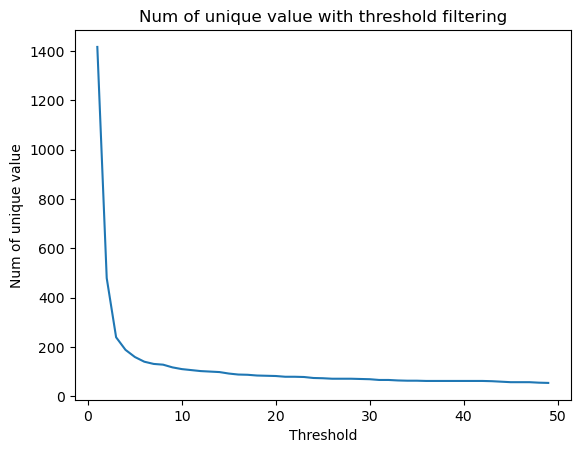

In [18]:
# train에만 나오는 것들 바꾸기
df_copy = df_train.copy()

df_copy['customer_country_preprocess'] = df_copy['customer_country'].str.replace('\s+', '', regex=True).replace('/', ' ', regex=True).str.strip().str.split()
df_copy['customer_country_preprocess'] = df_copy['customer_country_preprocess'].fillna(empty_list).apply(lambda x: x[-2:])

df_copy['customer_country_city'] = df_copy['customer_country_preprocess'].apply(lambda x: x[-2] if len(x) == 2 else None)
df_copy['customer_country_coun'] = df_copy['customer_country_preprocess'].apply(lambda x: x[-1] if len(x) >= 1 else None)

threshold_list = []
nunique_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 50):
    threshold = threshold
    value_counts = df_copy['customer_country_coun'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_country_coun'].isin(filtered_values)]

    threshold_list.append(threshold)
    nunique_list.append(filtered_df['customer_country_coun'].nunique())

# 그래프 그리기
plt.plot(threshold_list, nunique_list)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

In [134]:
from collections import defaultdict
import pandas as pd
from tqdm import tqdm

def calculate_mode(x):
    try:
        return x.mode().iloc[0]
    except IndexError:
        return None
    
def preprocess_country(df):
    empty_list = pd.Series([[]] * len(df))

    df['customer_country_preprocess'] = df['customer_country'].str.lower().str.replace('\s+', '', regex=True).replace('/', ' ', regex=True).str.strip().str.split()
    df['customer_country_preprocess'] = df['customer_country_preprocess'].fillna(pd.Series([[]] * len(df), index=df.index)).apply(lambda x: x[-2:])
    df['customer_country_len'] = df['customer_country_preprocess'].apply(list_length)
    df['customer_country_city'] = df['customer_country_preprocess'].apply(lambda x: x[-2] if len(x) == 2 else None)
    df['customer_country_coun'] = df['customer_country_preprocess'].apply(lambda x: x[-1] if len(x) >= 1 else None)

    return df

def calculate_mode(x):
    try:
        return x.mode().iloc[0]
    except IndexError:
        return None
    
df_train = preprocess_country(df_train)
filled_df = df_train.copy()

mode_couns = df_train.groupby('response_corporate')['customer_country_coun'].agg(calculate_mode).to_frame().reset_index()

mode_citys = df_train.groupby(['response_corporate', 'customer_country_coun'])['customer_country_city'].agg(calculate_mode).to_frame().reset_index()

# # 결측값을 가진 그룹만 추출하여 그룹화합니다.
missing_couns = filled_df[filled_df['customer_country_coun'].isnull()].groupby('response_corporate')

# # 각 그룹에서 'customer_country_coun' 열의 최빈값을 계산하고, 해당 그룹 내에서만 결측값을 갖는 행에 최빈값을 할당합니다.
for name, group in missing_couns:
    mode_coun = mode_couns[mode_couns['response_corporate'] == name]['customer_country_coun'].iloc[0]
    filled_df.loc[group.index, 'customer_country_coun'] = mode_coun

missing_citys = filled_df[filled_df['customer_country_city'].isnull()].groupby(['response_corporate', 'customer_country_coun'])

for name, group in missing_citys:
    mode_city = mode_citys[(mode_citys['response_corporate'] == name[0]) & (mode_citys['customer_country_coun'] == name[1])]['customer_country_city'].iloc[0]
    if mode_city:
        filled_df.loc[group.index, 'customer_country_city'] = mode_city

df_city_nan =  filled_df[filled_df['customer_country_city'].isna()]
result_df = filled_df.copy()

for idx, row in tqdm(df_city_nan.iterrows()):
    if row['customer_country_coun'] in ['iran', 'latvia', 'lithuania']:
        most_common_city = filled_df[filled_df['customer_country_coun'] == row['customer_country_coun']]['customer_country_city'].value_counts().idxmax()
        result_df.at[idx, 'customer_country_city'] = most_common_city
        continue

    response_data = filled_df[filled_df['response_corporate'] == row['response_corporate']]

    # 해당 응답의 국가와 도시를 빈도별로 계산합니다.
    country_counts = response_data['customer_country_coun'].value_counts()
    
    most_common_coun = country_counts.idxmax()
    result_df.at[idx, 'customer_country_coun'] = most_common_coun
    
    city_counts = response_data['customer_country_city'].value_counts()

    if not city_counts.empty:
        most_common_city = city_counts.idxmax()
        result_df.at[idx, 'customer_country_city'] = most_common_city

print(result_df['customer_country_city'].isna().sum())
print(result_df['customer_country_coun'].isna().sum())
# df_city_nan =  filled_df[filled_df['customer_country_city'].isna()]
# filled_df_2 = filled_df.copy()

# for idx, row in tqdm(df_city_nan.iterrows()):
#     if row['customer_country_coun'] in ['iran', 'latvia', 'lithuania']:
#         most_common_city = df_train[df_train['customer_country_coun'] == row['customer_country_coun']]['customer_country_city'].value_counts().idxmax()
#         filled_df_2.at[idx, 'customer_country_city'] = most_common_city
#         continue

#     response_data = df_train[df_train['response_corporate'] == row['response_corporate']]

#     # 해당 응답의 국가와 도시를 빈도별로 계산합니다.
#     country_counts = response_data['customer_country_coun'].value_counts()
    
#     most_common_coun = country_counts.idxmax()
#     filled_df_2.at[idx, 'customer_country_coun'] = most_common_coun
    
#     response_data = df_train[df_train['customer_country_coun'] == row['customer_country_coun']]
    
#     city_counts = response_data['customer_country_city'].value_counts()

#     if not city_counts.empty:
#         most_common_city = city_counts.idxmax()
#         filled_df_2.at[idx, 'customer_country_city'] = most_common_city
# filled_df['customer_country_city'] = filled_df.groupby(['response_corporate', 'customer_country_coun'])['customer_country_city'].transform(calculate_mode)

#     filled_df.loc[(filled_df['response_corporate'] == response_corporate) & (filled_df['customer_country_len'] == 0), 'customer_country_coun'] = most_common_coun

# if len(country_city_count) and country_coun != '':
#     most_common_city = max(set(country_city_count), key=country_city_count.count)  # 최빈값을 찾기 위해 set으로 중복 제거 후 count 메서드 사용
#     filled_df.loc[(filled_df['response_corporate'] == response_corporate) & (filled_df['customer_country_coun'] == country_coun) & (filled_df['customer_country_len'] <= 1), 'customer_country_city'] = most_common_city


# # country_city 결측치 안채워지는 경우 (나라부터 잘못 채워진 경우가 많다)
# df_city_nan =  filled_df[filled_df['customer_country_city'].isna()]

# filled_df_2 =  filled_df.copy()

# for idx, row in tqdm(df_city_nan.iterrows()):
#     if row['customer_country_coun'] in ['iran', 'latvia', 'lithuania']:
#         most_common_city = filled_df[filled_df['customer_country_coun'] == row['customer_country_coun']]['customer_country_city'].value_counts().idxmax()
#         filled_df_2.at[idx, 'customer_country_city'] = most_common_city
#         continue

#     response_data = filled_df[filled_df['response_corporate'] == row['response_corporate']]

#    # 해당 응답의 국가와 도시를 빈도별로 계산합니다.
#     country_counts = response_data['customer_country_coun'].value_counts()
#     city_counts = response_data['customer_country_city'].value_counts()

#     most_common_coun = country_counts.idxmax()
#     filled_df_2.at[idx, 'customer_country_coun'] = most_common_coun

#     if not city_counts.empty:
#         most_common_city = city_counts.idxmax()
#         filled_df_2.at[idx, 'customer_country_city'] = most_common_city

584it [00:04, 130.11it/s]

0
0


In [127]:
filled_df['customer_country_city'].nunique()

9731

In [128]:
filled_df['customer_country_coun'].nunique()

1346

In [129]:
filled_df['customer_country_city'].isna().sum()

584

In [130]:
filled_df['customer_country_coun'].isna().sum()

0

In [91]:
filled_df[filled_df['customer_country_city'].isna()]['customer_country_coun'].value_counts()

customer_country_coun
uaedubai                            23
700patrooncreekblvdalbanyny12206    15
ecuador                             14
serbia                               6
hongkong                             5
                                    ..
keseba@swift-eg.com                  1
mostafa@mark-all.com                 1
sameh_azema@yahoo.com                1
amrmelwani@gmail.com                 1
shswaify@hotmail.com                 1
Name: count, Length: 402, dtype: int64

In [92]:
filled_df_2['customer_country_city'].isna().sum()

3

In [93]:
filled_df_2['customer_country_coun'].isna().sum()

0

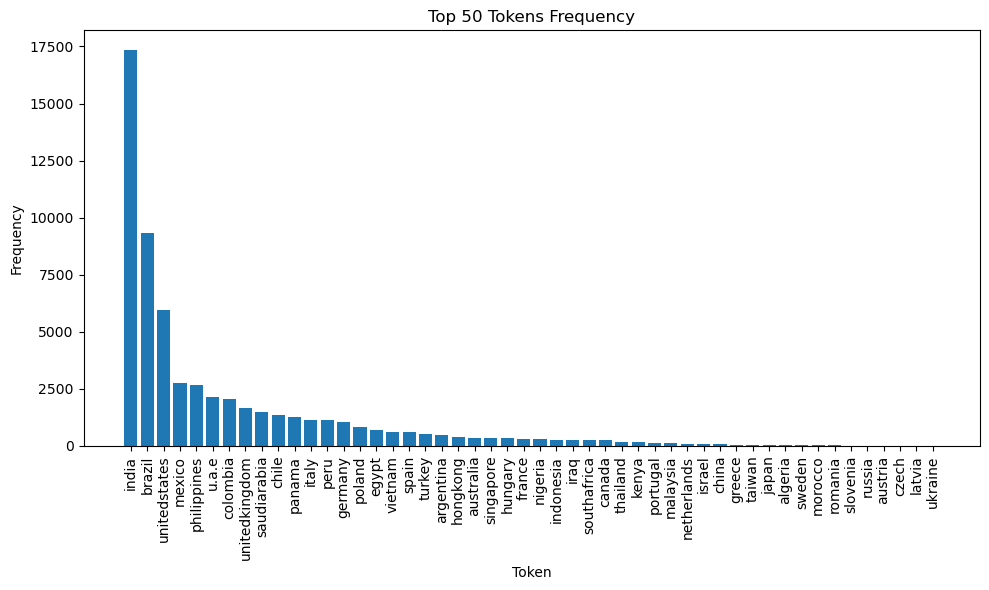

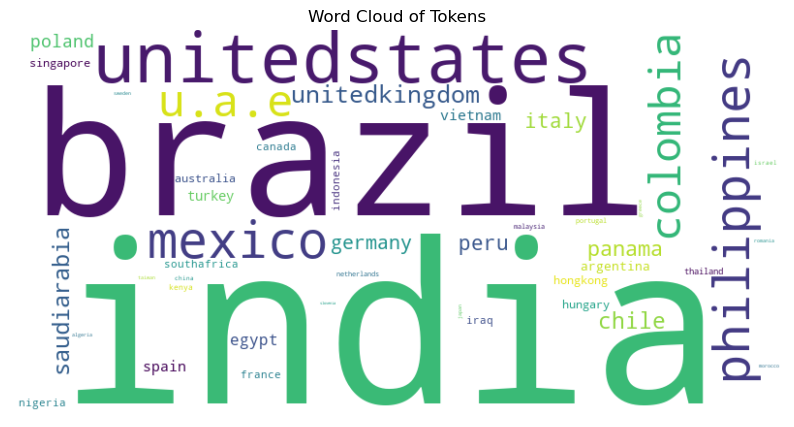

In [60]:
wordcloud_visualize(filled_df['customer_country_coun'])

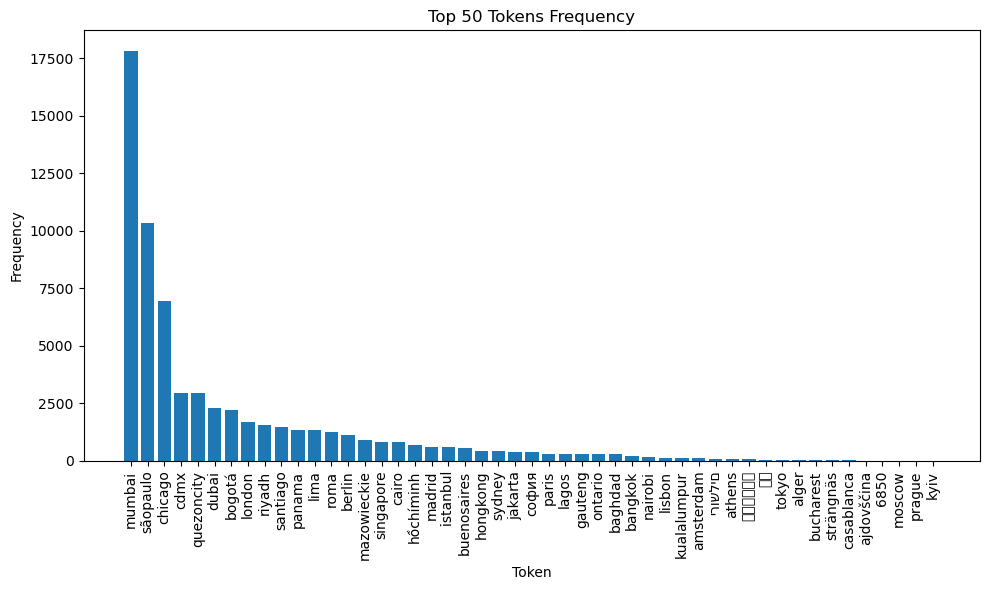

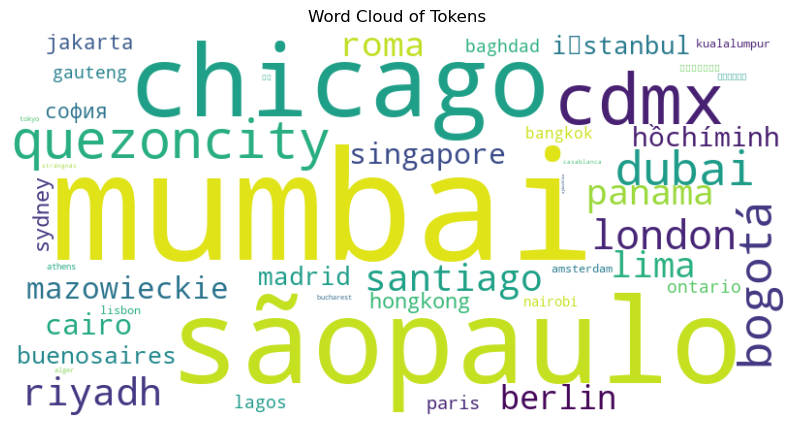

In [145]:
wordcloud_visualize(filled_df['customer_country_city'])

In [9]:
# for cor in df_con_cor['response_corporate'].unique():
#     # if cor == 'LGEKR':
#     print(cor)
#     wordcloud_visualize(df_con_cor[df_con_cor['response_corporate'] == cor]['customer_country'])

LGEPH: 필리핀 \
LGEIL: 인도 \
LGEAF: 아프리카 \
LGESJ: 사우디아라비아 \
LGESL: 남부아시아, 오세아니아(방글라데시, 싱가포르, 몰디브, 피지, 파푸아뉴기니 등) \
LGESP: 브라질 \
LGEGF: 중동(UAE, 카타르, 이란, 오만, 파키스탄 등) \
LGESA: 남부 아프리카 (남아공 등), 홍콩(이상치?) \
LGEUS: 미국 \
LGECB: 콜롬비아 \
LGEMS: 멕시코 \
LGEEG: 북아프리카(이집트, 튀니지 등) \
LGEEF: 중아프리카(케냐, 에티오피아 등) \
LGEAP: 호주 \
LGEIN: 인도네시아 \
LGEUK: 영연방(아일랜드 포함) \
LGEKR: 여러 나라 섞여 있음(한국의 외국 지사인듯) \
LGEPS: 중남미(에콰도르, 파나마, 코스타리카 등) \
LGECI: 캐나다 \
LGECL: 중남미 남부(칠레, 볼리비아, 우루과이 등) \
LGETK: 터키(터키, 튀르키예 섞여있음) \
LGELF: 중동(이라크, 요르단 레바논, 이스라엘(?) 등) \
LGEPT: 포르투갈 \
LGEPR: 페루 \
LGEDG: 중부 유럽(독일, 스위스) \
LGERO: 루마니아 \
LGEMK: 동유럽(헝가리, 불가리아, 세르비아, 크로아티아 등) \
LGEPL: 폴란드 \
LGECZ: 체코 \
LGEES: 스페인 (파나마, 멕시코 등 섞여 있음) \
LGEAR: 아르헨티나 \
LGEHK: 홍콩 \
LGEML: 말레이시아 \
LGEJP: 일본 \
LGEHS: 그리스, 키프로스 \
LGEAS: 알제리 \
LGEYK: 이스라엘 \
LGEIS: 이탈리아 (몰타?) \
LGEBN: 벨기에, 네덜란드 \
LGEFS: 프랑스 \
LGESW: 북유럽(스웨덴, 덴마크, 노르웨이 등) \
LGEMC: 모로코, 수단 \
LGEAG: 오스트리아, 스위스 \
LGEEB: 슬로베니아 \
LGETH: 동남아(태국, 미얀마, 라오스 등) \
LGEVH: 베트남 \
LGECH: 중국 \
LGELA: 라트비아, 리투아니아 \
LGETT: 타이완 \
LGERA: 러시아 \
LGEUR: 우크라이나 \
LGEIR: 이란 \
LGEBT: 포르투갈(리스본) 

#### 전처리 idea
##### 1. 법인명의 지역이 잘 구분되어 있음 (customer_country 빼도 좋을듯?)
##### 2. 법인명 지역 활용해서 대륙 feature 생성 가능할 듯 
##### 3. customer_country 결측치를 response_corporate를 활용해서 채울 수 있을 듯
##### 4. customer_country 대륙/나라/도시 기준 전처리 가능할 듯

### customer_idx: 고객의 회사명

In [10]:
cus_idx_tr = df_train['customer_idx']
cus_idx_te = df_test['customer_idx']

In [11]:
len(sorted(cus_idx_tr.unique()))

35112

In [12]:
len(sorted(cus_idx_te.unique()))

4069

In [13]:
# 교집합
len(sorted(list(set(cus_idx_te.unique()).intersection(set(cus_idx_tr.unique())))))

445

In [14]:
# 차집합 (test - train)
len(sorted(list(set(cus_idx_te.unique()).difference(set(cus_idx_tr.unique())))))

3624

In [15]:
# 집합 (train - test)
len(sorted(list(set(cus_idx_tr.unique()).difference(set(cus_idx_te.unique())))))

34667

##### 1. 범주형 변수로 취급
##### 2. 생각보다 교집합이 별로 없음(submission에 새로 등장하는 customer_idx가 많음) -> 라벨 인코딩 하면 좋을듯

### customer_type: 고객 유형

In [16]:
cus_type = df['customer_type']
cus_type

0                 End-Customer
1                 End-Customer
2                 End-Customer
3                 End-Customer
4        Specifier/ Influencer
                 ...          
64565                      NaN
64566                      NaN
64567    Specifier/ Influencer
64568             End Customer
64569             End Customer
Name: customer_type, Length: 64570, dtype: object

In [17]:
cus_type.value_counts()

customer_type
End-Customer                    6648
End Customer                    6449
Specifier/ Influencer           3313
Channel Partner                 1695
Service Partner                  447
Solution Eco-Partner             292
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         18
Technician                        16
Consultant                        15
Home Owner                        10
Other                             10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Reseller                           5
Homeowner                          5
Architect/Consultant               5
Interior Designer                  5
Installer                          5
Distributor                        4
Others                  

In [18]:
cus_type.nunique()

33

In [19]:
tr_cus_type = df_train['customer_type']
te_cus_type = df_test['customer_type']

In [29]:
tr_cus_type.nunique()

33

In [20]:
tr_cus_type.value_counts()

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Home Owner                        10
Other                             10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Reseller                           5
Homeowner                          5
Architect/Consultant               5
Interior Designer                  5
Installer                          5
Distributor                        4
Others                  

In [30]:
# train에만 나오는 것들 바꾸기
df_copy = df_train.copy()
cus_type = df_copy['customer_type']

threshold_list = []
nunique_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 50):
    threshold = threshold
    value_counts = df_copy['customer_type'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_type'].isin(filtered_values)]

    threshold_list.append(threshold)
    nunique_list.append(filtered_df['customer_type'].nunique())

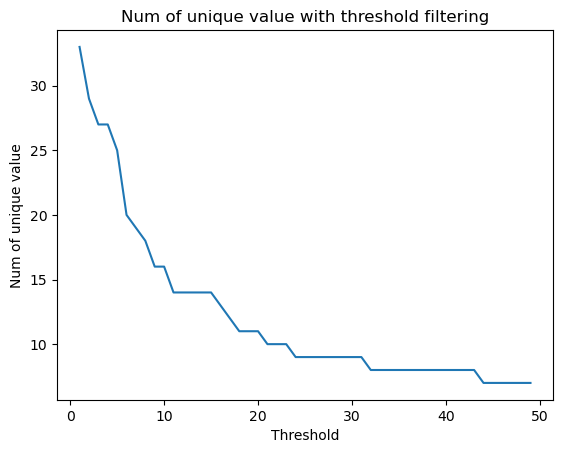

In [31]:
# 그래프 그리기
plt.plot(threshold_list, nunique_list)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

### customer_job: 고객의 직업군

In [32]:
cus_job = df['customer_job']
cus_job

0                     purchasing
1        media and communication
2                    engineering
3               entrepreneurship
4                     consulting
                  ...           
64565                      sales
64566                        NaN
64567           entrepreneurship
64568                        NaN
64569                        NaN
Name: customer_job, Length: 64570, dtype: object

In [33]:
cus_job.value_counts()

customer_job
engineering                   7070
other                         4876
administrative                3666
education                     2695
sales                         2380
                              ... 
facilities and operations        1
technical / decision maker       1
installation and purchaser       1
hr posting                       1
part of video wall               1
Name: count, Length: 562, dtype: int64

In [34]:
cus_job.nunique()

562

In [35]:
tr_cus_job = df_train['customer_job']
te_cus_job = df_test['customer_job']

In [36]:
tr_cus_job.nunique()

560

In [108]:
# n번 이상 나오는 것들 갯수 체크

# 비슷한 값 처리
df_copy = df_train.copy()
df_copy.loc[df_copy['customer_job'] == 'others', 'customer_job'] = 'other'

job_nunique = []
threshold_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 50):
    threshold = threshold
    value_counts = df_copy['customer_job'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_job'].isin(filtered_values)]

    threshold_list.append(threshold)
    job_nunique.append(filtered_df['customer_job'].nunique())

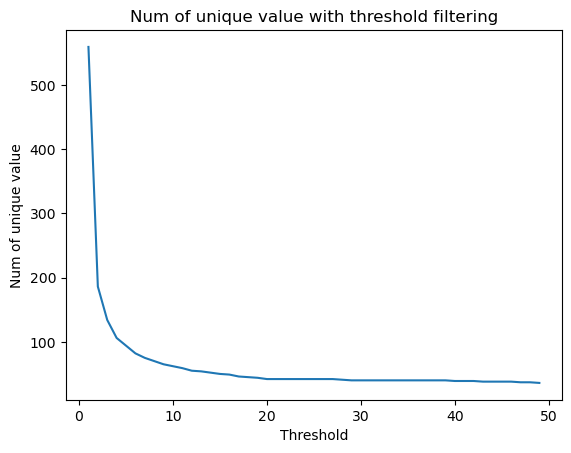

In [109]:
# 그래프 그리기
plt.plot(threshold_list, job_nunique)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

In [110]:
cus_job = df_copy['customer_job']
cus_job.isna().sum()

18733

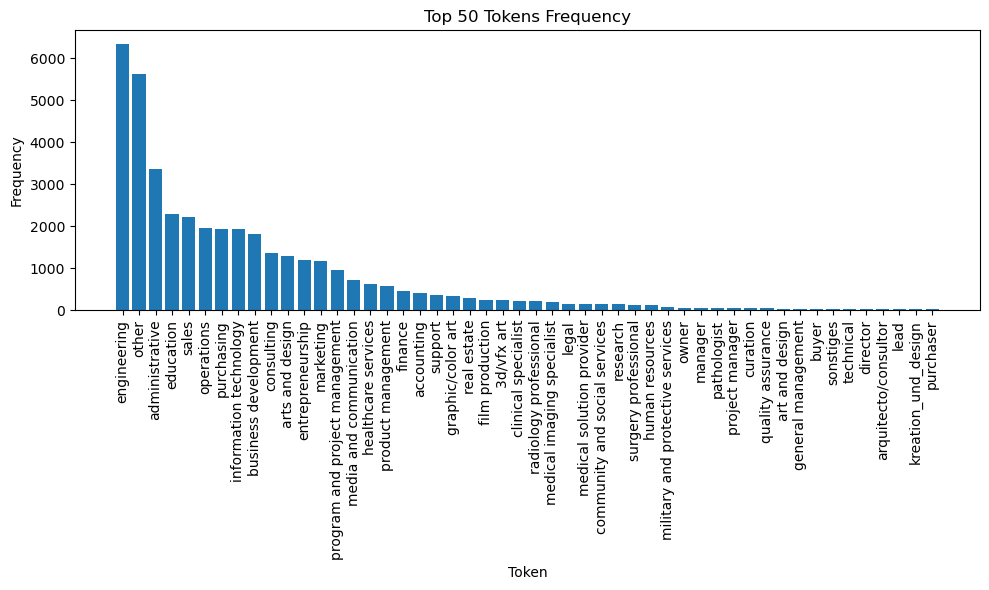

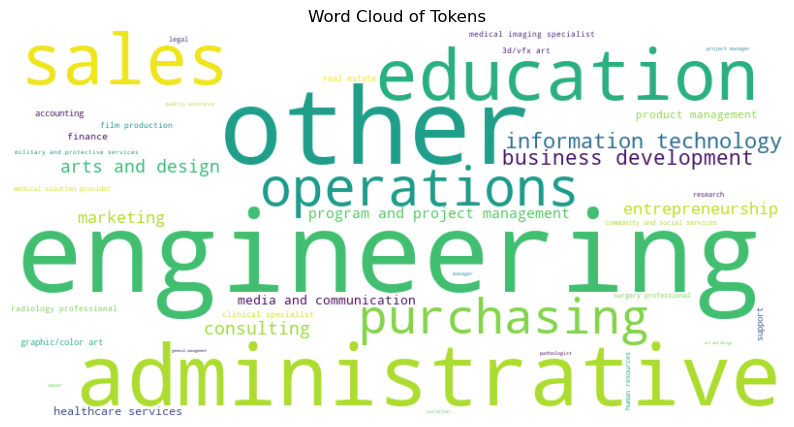

In [42]:
wordcloud_visualize(cus_job)

#### 전처리 idea
##### 1. 결측치가 많음(None으로 채우기)
##### 2. Threshold 활용해서 적게 나오는 feature는 other로 변경

### customer_position: 고객의 회사 직책

In [43]:
cus_pos = df['customer_position']
cus_pos

0              entry level
1              ceo/founder
2                  partner
3              ceo/founder
4                  partner
               ...        
64565    associate/analyst
64566                 none
64567              manager
64568                 none
64569                 none
Name: customer_position, Length: 64570, dtype: object

In [44]:
cus_pos.value_counts()

customer_position
none                                                  21637
manager                                                8943
ceo/founder                                            8577
other                                                  6524
director                                               5186
                                                      ...  
técnico                                                   1
quantitative aptitude faculty                             1
english trainer for ielts,toefl,pte,gre,sat exams.        1
associate professor                                       1
architecture/consult                                      1
Name: count, Length: 118, dtype: int64

In [45]:
cus_pos.nunique()

118

In [46]:
cus_pos.isna().sum()

0

In [47]:
tr_cus_pos = df_train['customer_position']
te_cus_pos = df_test['customer_position']

In [48]:
tr_cus_pos.nunique()

117

In [49]:
# 차집합
cus_pos_only_tr = list(set(tr_cus_pos.unique()).difference(set(te_cus_pos.unique())))
len(cus_pos_only_tr)

95

In [50]:
# 차집합
cus_pos_only_te = list(set(te_cus_pos.unique()).difference(set(tr_cus_pos.unique())))
len(cus_pos_only_te)

1

In [57]:
# n번 이상 나오는 것들 갯수 체크

# 비슷한 값 처리
df_copy = df_train.copy()
df_copy.loc[df_copy['customer_position'] == 'others', 'customer_position'] = 'other'

position_nunique = []
threshold_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 50):
    threshold = threshold
    value_counts = df_copy['customer_position'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_position'].isin(filtered_values)]

    threshold_list.append(threshold)
    position_nunique.append(filtered_df['customer_position'].nunique())

Index(['none', 'manager', 'ceo/founder', 'other', 'director',
       'associate/analyst', 'partner', 'entry level', 'c-level executive',
       'trainee',
       ...
       'career coach', 'product management', 'market intelligence/research',
       'teacher/middle school coordinator', 'assistant professor of enlish',
       'professor', 'quantitative aptitude faculty',
       'english trainer for ielts,toefl,pte,gre,sat exams.',
       'associate professor', 'distributor'],
      dtype='object', name='customer_position', length=116)


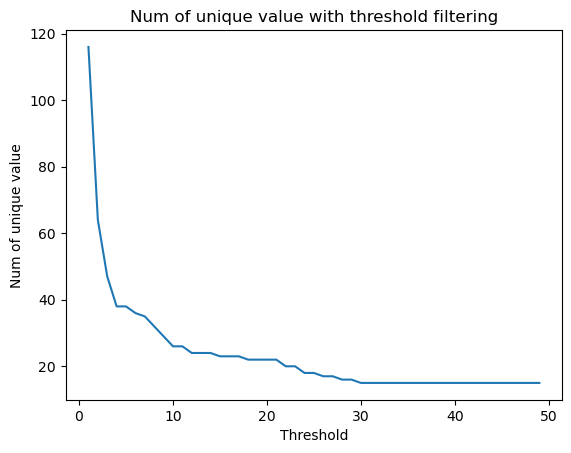

In [55]:
# 그래프 그리기
plt.plot(threshold_list, position_nunique)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

In [53]:
cus_pos = df_copy['customer_position']
cus_pos.isna().sum()

0

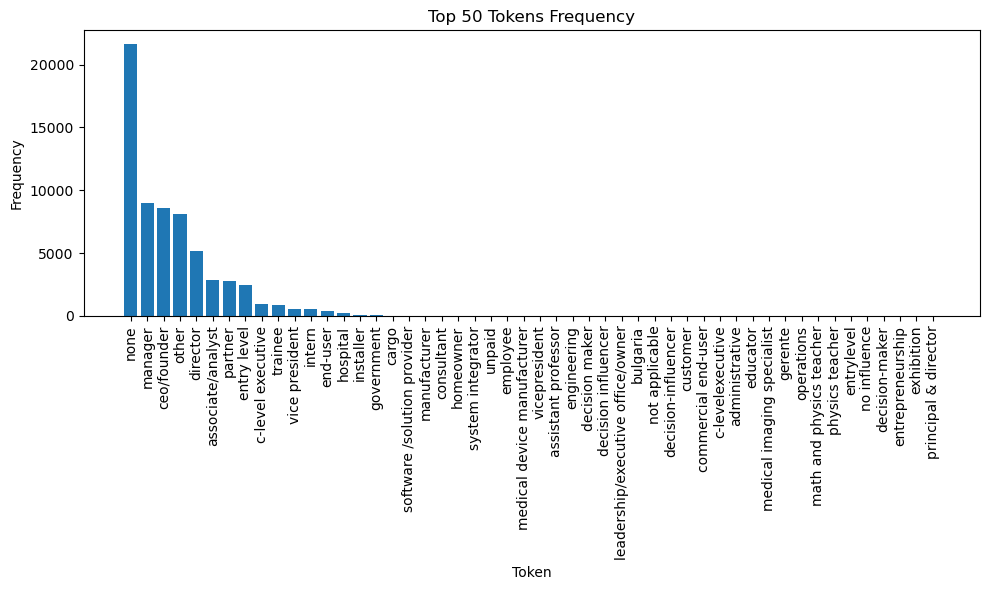

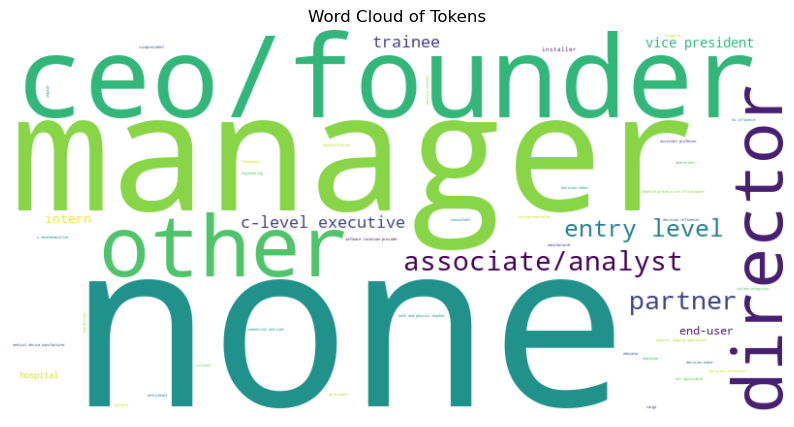

In [36]:
wordcloud_visualize(cus_pos)

#### 전처리 idea
##### 1. 결측치가 많음(none으로 채우기)
##### 2. Threshold 활용해서 적게 나오는 feature는 other로 변경